In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("../data/processed/cleaned_sampled_df.csv")

In [3]:
df.head(5)

,annuity_780A,cntpmts24_3658933L,maininc_215A,downpmt_116A,avgdbddpdlast24m_3658932P,empl_employedtotal_800L,target
0,6747.2000,0.0,28000.0,0.0,-5.0,Missing,0
1,2206.6000,10.0,40000.0,3000.0,-5.0,Missing,0
2,3342.4001,15.0,56000.0,0.0,-5.0,Missing,0
3,3141.4001,12.0,20000.0,0.0,-6.0,Missing,0
4,6327.6000,14.0,40000.0,0.0,-8.0,Missing,0


In [4]:
df.shape

(50000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   annuity_780A               50000 non-null  float64
 1   cntpmts24_3658933L         50000 non-null  float64
 2   maininc_215A               50000 non-null  float64
 3   downpmt_116A               50000 non-null  float64
 4   avgdbddpdlast24m_3658932P  50000 non-null  float64
 5   empl_employedtotal_800L    50000 non-null  object 
 6   target                     50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


Before we train and test our model. Lets identify categorical objects in our data that could be used to convert into numeric identifiers so we could train our model.

In [6]:
df_encoded = pd.get_dummies(df, columns = ["empl_employedtotal_800L"], prefix=["reported_employment_date"])
df_encoded = df_encoded.astype(int)

In [7]:
df_encoded.head(10)

,annuity_780A,cntpmts24_3658933L,maininc_215A,downpmt_116A,avgdbddpdlast24m_3658932P,target,reported_employment_date_Missing,reported_employment_date_Present
0,6747,0,28000,0,-5,0,1,0
1,2206,10,40000,3000,-5,0,1,0
2,3342,15,56000,0,-5,0,1,0
3,3141,12,20000,0,-6,0,1,0
4,6327,14,40000,0,-8,0,1,0
5,2464,10,40000,0,-5,0,0,1
6,1692,10,90000,0,260,0,1,0
7,3048,25,40000,0,-7,0,1,0
8,4861,8,20000,0,-23,0,1,0
9,1631,4,60000,0,-2,0,0,1


In [8]:
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [10]:
tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.54%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.995307     1.000000  0.995429      0.997654      0.995450
recall         1.000000     0.849906  0.995429      0.924953      0.995429
f1-score       0.997648     0.918864  0.995429      0.958256      0.995248
support    33934.000000  1066.000000  0.995429  35000.000000  35000.000000
_______________________________________________
Confusion Matrix: 
 [[33934     0]
 [  160   906]]

Test Result:
Accuracy Score: 94.33%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.972069    0.043103  0.943333      0.507586      0.945687
recall         0.969535    0.046948  0.943333      0.508242      0.943333
f1-score       0.970800    0.044944  0.943333      0.507872      0.944506
support    145

In [12]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 98.33%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.983137     0.993840  0.983286      0.988488      0.983463
recall         0.999912     0.454034  0.983286      0.726973      0.983286
f1-score       0.991453     0.623310  0.983286      0.807381      0.980241
support    33934.000000  1066.000000  0.983286  35000.000000  35000.000000
_______________________________________________
Confusion Matrix: 
 [[33931     3]
 [  582   484]]

Test Result:
Accuracy Score: 95.85%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.971734    0.037736  0.95853

In [13]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.53%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.995423     0.991285  0.995314      0.993354      0.995297
recall         0.999764     0.853659  0.995314      0.926711      0.995314
f1-score       0.997589     0.917339  0.995314      0.957464      0.995145
support    33934.000000  1066.000000  0.995314  35000.000000  35000.000000
_______________________________________________
Confusion Matrix: 
 [[33926     8]
 [  156   910]]

Test Result:
Accuracy Score: 96.53%
_______________________________________________
CLASSIFICATION REPORT:
                      0      1  accuracy     macro avg  weighted avg
precision      0.971419    0.0  0.965267      0.485709      0.943831
recall         0.993482    0.0  0.965267      0.496741      0.965267
f1-score       0.982326    0.0  0.965267      0.491163      0.954428
support    14574.000000  426.0  0.

In [15]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=rf_clf, 
    scoring='f1',
    param_distributions=random_grid, 
    n_iter=200, 
    cv=5, 
    verbose=1, 
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/jacob/anaconda3/envs/phase1/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/jacob/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
460 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
305 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jacob/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_par

Best paramters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})


In [16]:
rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.54%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.995307     1.000000  0.995429      0.997654      0.995450
recall         1.000000     0.849906  0.995429      0.924953      0.995429
f1-score       0.997648     0.918864  0.995429      0.958256      0.995248
support    33934.000000  1066.000000  0.995429  35000.000000  35000.000000
_______________________________________________
Confusion Matrix: 
 [[33934     0]
 [  160   906]]

Test Result:
Accuracy Score: 96.33%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.971617    0.030303  0.963333      0.500960      0.944884
recall         0.991217    0.009390  0.963333      0.500303      0.963333
f1-score       0.981319    0.014337  0.963333      0.497828      0.953857
support    145

Accuracy: 0.9630666666666666
Best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


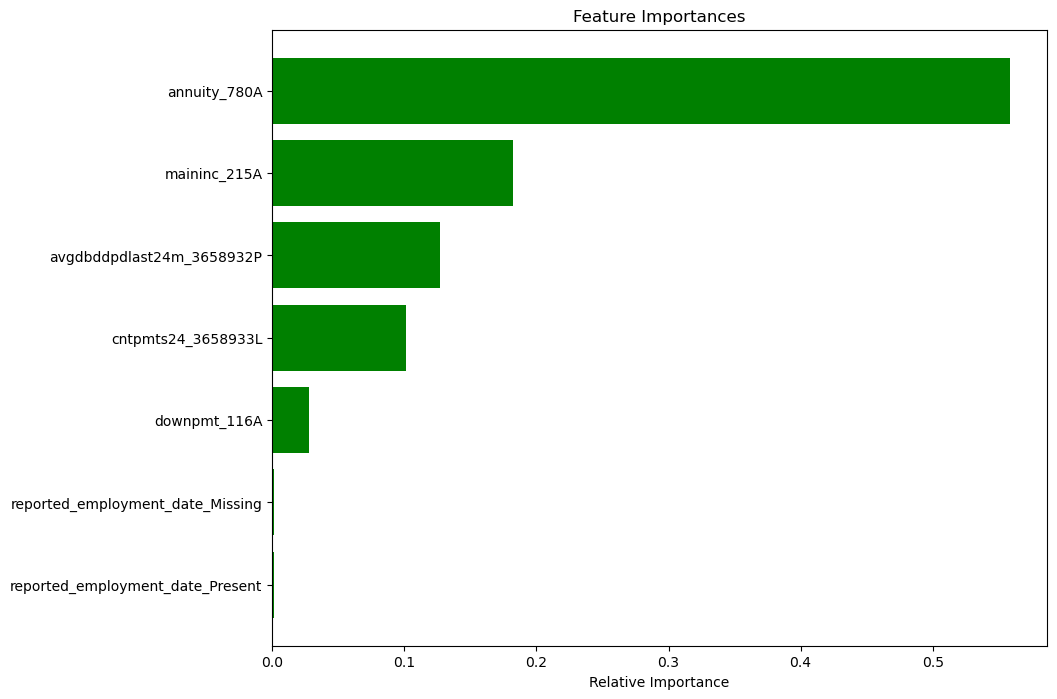

In [17]:
# Predict on the test set using the best model
best_model = rf_cv.best_estimator_
y_pred = best_model.predict(X_test)

# Print accuracy and best parameters
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Best parameters:", rf_cv.best_params_)

# Visualize feature importances
features = X.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()